In [16]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pprint import pprint

In [2]:
#set themes
sns.set_theme(style="darkgrid", context='talk')
np.set_printoptions(threshold=np.inf)

In [3]:
df = pd.read_csv('data/cleanedData_v2.csv')

In [4]:
#drop columns
print(df.columns[0:60])
print(df.columns[60:120])


Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita', 'biofuel_electricity', 'biofuel_share_elec',
       'biofuel_share_energy', 'carbon_intensity_elec', 'coal_cons_change_pct',
       'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption',
       'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct',
       'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production',
       'coal_share_elec', 'coal_share_energy', 'electricity_demand',
       'electricity_generation', 'electricity_share_energy',
       'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita',
       'energy_per_gdp', 'fossil_cons_change_pct', 'fossil_cons_change_twh',
       'fossil_elec_per_capita', 'fossil_electricity',
       'fossil_energy_per_capita', 'fossil_fuel_consumption',
       'fossil_share_elec', 'fossil_

In [5]:
df['renewables_share_energy'].describe()

count    3109.000000
mean       10.555660
std        12.633783
min         0.000000
25%         1.874000
50%         5.601000
75%        15.147000
max        74.302000
Name: renewables_share_energy, dtype: float64

In [6]:
columns_to_drop = ['biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita', 'biofuel_electricity', 'biofuel_share_elec',
       'biofuel_share_energy']
try:
       df.drop([columns_to_drop], axis=1, inplace=True)
except:
       print('columns already dropped')



columns already dropped


In [14]:
#calculate gdp/capita and add column
df['gdp_per_capita'] = df['gdp']/df['population']

In [ ]:
df['gdp_per_capita'].describe()

count      7603.000000
mean      11963.811844
std       13847.867580
min         365.696469
25%        2397.116123
50%        6945.880344
75%       16619.347932
max      166150.492457
Name: gdp_per_capita, dtype: float64

In [18]:
pprint(df.columns[0:60])
pprint(df.columns[60:120])

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita', 'biofuel_electricity', 'biofuel_share_elec',
       'biofuel_share_energy', 'carbon_intensity_elec', 'coal_cons_change_pct',
       'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption',
       'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct',
       'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production',
       'coal_share_elec', 'coal_share_energy', 'electricity_demand',
       'electricity_generation', 'electricity_share_energy',
       'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita',
       'energy_per_gdp', 'fossil_cons_change_pct', 'fossil_cons_change_twh',
       'fossil_elec_per_capita', 'fossil_electricity',
       'fossil_energy_per_capita', 'fossil_fuel_consumption',
       'fossil_share_elec', 'fossil_

In [133]:
#create df for modelling total energy consumption
modeling_df_emissions = df.loc[:, ['other_renewable_consumption', 'renewables_consumption','fossil_fuel_consumption','year', 'population', 'gdp', 'gdp_per_capita', 'primary_energy_consumption','greenhouse_gas_emissions']].dropna()

In [31]:
#multivariate regression to determine emissions based on generic variables.
X = modeling_df_emissions.drop('greenhouse_gas_emissions', axis=1)
y = modeling_df_emissions['greenhouse_gas_emissions']

In [32]:
#add constant
X = sm.add_constant(X)
lin_reg = sm.OLS(y, X)

In [33]:
#fit model
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                               OLS Regression Results                               
Dep. Variable:     greenhouse_gas_emissions   R-squared:                       0.977
Model:                                  OLS   Adj. R-squared:                  0.977
Method:                       Least Squares   F-statistic:                     7622.
Date:                      Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                              20:46:57   Log-Likelihood:                -7085.2
No. Observations:                      1278   AIC:                         1.419e+04
Df Residuals:                          1270   BIC:                         1.423e+04
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [283]:
#drop gdp based on p value
X = modeling_df_emissions.drop(['greenhouse_gas_emissions', 'gdp'], axis=1)
y = modeling_df_emissions['greenhouse_gas_emissions']

In [284]:
print(X.shape)
print(y.shape)

(1278, 8)
(1278,)


In [285]:
#add constant
X = sm.add_constant(X)
lin_reg = sm.OLS(y, X)

In [286]:
print(X.shape)

(1278, 9)


In [36]:
#fit model
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                               OLS Regression Results                               
Dep. Variable:     greenhouse_gas_emissions   R-squared:                       0.977
Model:                                  OLS   Adj. R-squared:                  0.977
Method:                       Least Squares   F-statistic:                     7624.
Date:                      Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                              20:48:22   Log-Likelihood:                -7085.0
No. Observations:                      1278   AIC:                         1.419e+04
Df Residuals:                          1270   BIC:                         1.423e+04
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [99]:
def remove_high_pvalue(model, X):
    while model.pvalues.max() > 0.05:
        p_values = model.pvalues
        p_values = p_values.drop('const')
        p_values = p_values[p_values != p_values.max()]
        p_values = p_values.index.tolist()
        X = X[p_values]
        X = sm.add_constant(X)
        lin_reg = sm.OLS(y, X)
        model = lin_reg.fit()
    return model, X
# Xtest = X.drop(p_values, axis=1)
# Xtest
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     greenhouse_gas_emissions   R-squared:                       0.971
Model:                                  OLS   Adj. R-squared:                  0.971
Method:                       Least Squares   F-statistic:                 1.427e+04
Date:                      Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                              21:47:24   Log-Likelihood:                -7224.1
No. Observations:                      1278   AIC:                         1.446e+04
Df Residuals:                          1274   BIC:                         1.448e+04
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -26.9003      2.114    -12.726      0.000     -31.047     -22.753
renewables_consumption      0.0436      0.008      5.226      0.000       0.027       0.060
fossil_fuel_consumption     0.0887      0.001     95.067      0.000       0.087       0.091
population               1.442e-07   1.23e-08     11.706      0.000     1.2e-07    1.68e-07
==============================================================================
Omnibus:                      566.245   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41614.727
Skew:                           1.171   Prob(JB):                         0.00
Kurtosis:                      30.857   Cond. No.                     2.56e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

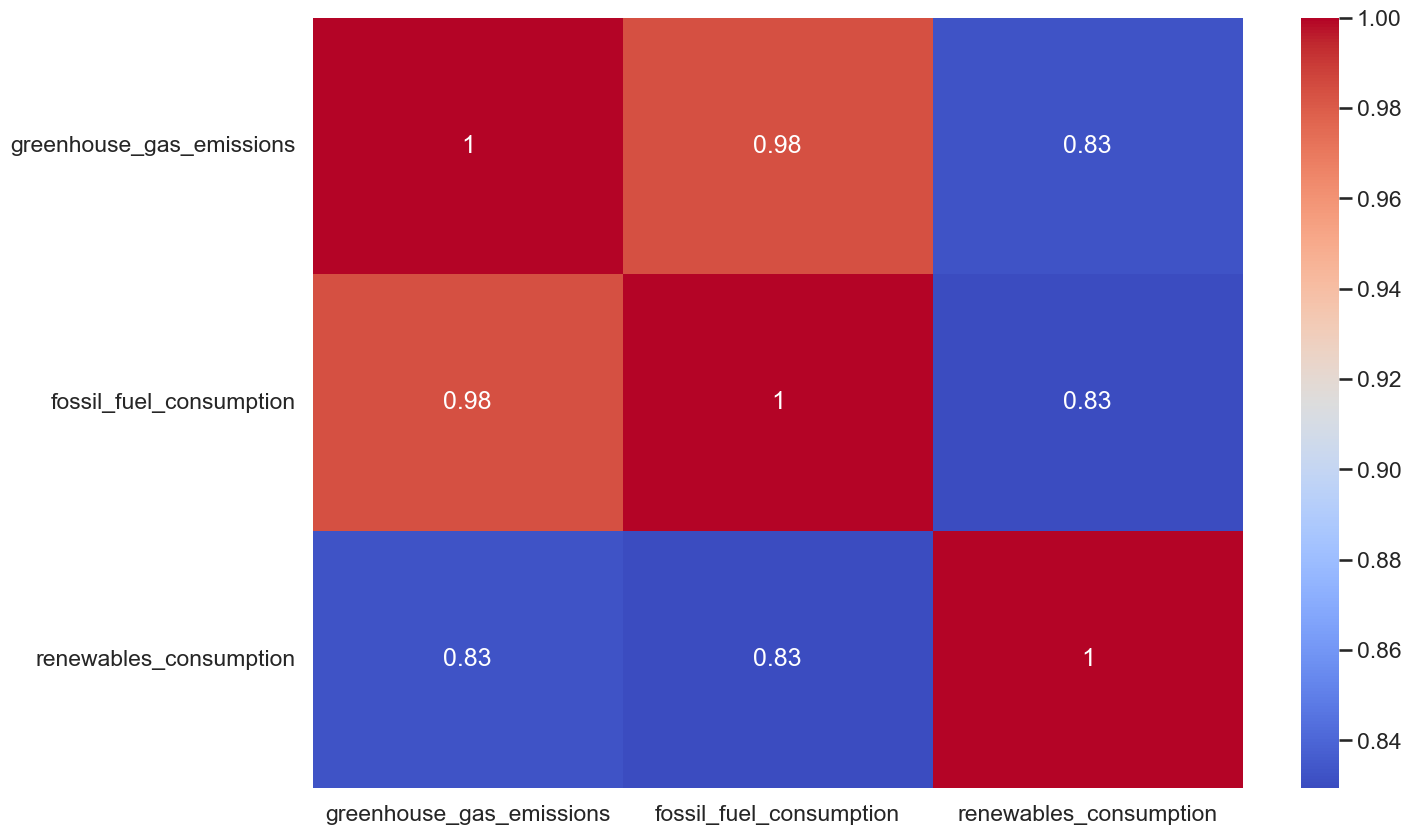

In [105]:
#potentially high collinearity. check correlation matrix
modeling_df_emissions.drop(['year', 'gdp'], axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(modeling_df_emissions[['greenhouse_gas_emissions','fossil_fuel_consumption', 'renewables_consumption']].corr(), annot=True, cmap='coolwarm')


In [282]:
X.drop('primary_energy_consumption', axis=1, inplace=True)

KeyError: "['primary_energy_consumption'] not found in axis"

In [ ]:
X

In [75]:
#add constant
X = sm.add_constant(X)
lin_reg = sm.OLS(y, X)

In [78]:
#fit model
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                               OLS Regression Results                               
Dep. Variable:     greenhouse_gas_emissions   R-squared:                       0.971
Model:                                  OLS   Adj. R-squared:                  0.971
Method:                       Least Squares   F-statistic:                     8557.
Date:                      Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                              21:37:18   Log-Likelihood:                -7223.6
No. Observations:                      1278   AIC:                         1.446e+04
Df Residuals:                          1272   BIC:                         1.449e+04
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [101]:
model, X = remove_high_pvalue(model, X)
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     greenhouse_gas_emissions   R-squared:                       0.971
Model:                                  OLS   Adj. R-squared:                  0.971
Method:                       Least Squares   F-statistic:                 1.427e+04
Date:                      Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                              21:47:30   Log-Likelihood:                -7224.1
No. Observations:                      1278   AIC:                         1.446e+04
Df Residuals:                          1274   BIC:                         1.448e+04
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     greenhouse_gas_emissions   R-squared:                       0.971
Model:                                  OLS   Adj. R-squared:                  0.971
Method:                       Least Squares   F-statistic:                 1.427e+04
Date:                      Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                              21:55:17   Log-Likelihood:                -7224.1
No. Observations:                      1278   AIC:                         1.446e+04
Df Residuals:                          1274   BIC:                         1.448e+04
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -26.9003      2.114    -12.726      0.000     -31.047     -22.753
renewables_consumption      0.0436      0.008      5.226      0.000       0.027       0.060
fossil_fuel_consumption     0.0887      0.001     95.067      0.000       0.087       0.091
population               1.442e-07   1.23e-08     11.706      0.000     1.2e-07    1.68e-07
==============================================================================
Omnibus:                      566.245   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41614.727
Skew:                           1.171   Prob(JB):                         0.00
Kurtosis:                      30.857   Cond. No.                     2.56e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='renewables_consumption', ylabel='greenhouse_gas_emissions'>

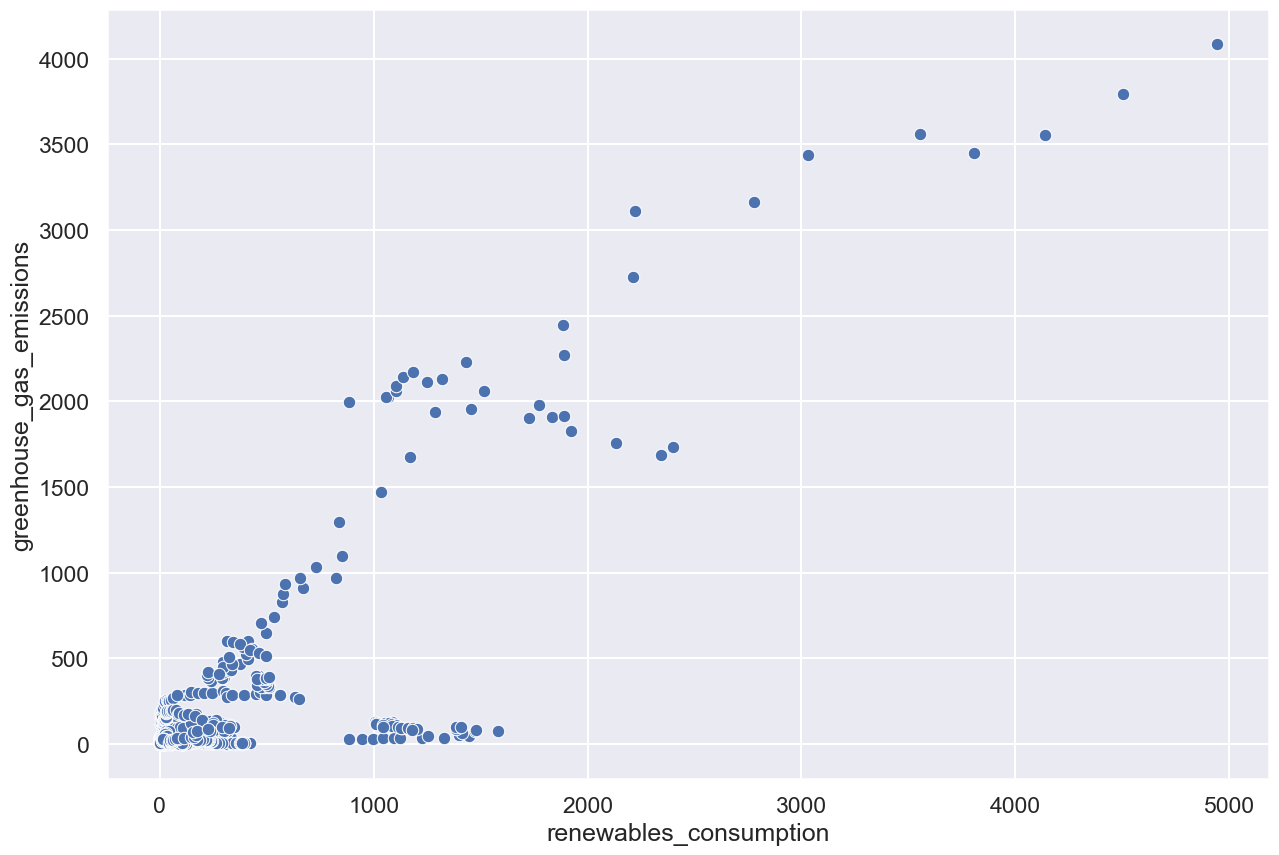

In [106]:
#plot scatter plot of greenhouse gas vs renewables consumption
plt.figure(figsize=(15,10))
sns.scatterplot(x='renewables_consumption', y='greenhouse_gas_emissions', data=modeling_df_emissions)

In [323]:
df.loc[:, 'emissions_per_capita'] = df['greenhouse_gas_emissions']/df['population'] * 1e9

In [324]:
modeling_df_emissions.loc[:,'emissions_per_capita'] = modeling_df_emissions['greenhouse_gas_emissions']/modeling_df_emissions['population'] * 1e9

<Axes: xlabel='gdp_per_capita', ylabel='emissions_per_capita'>

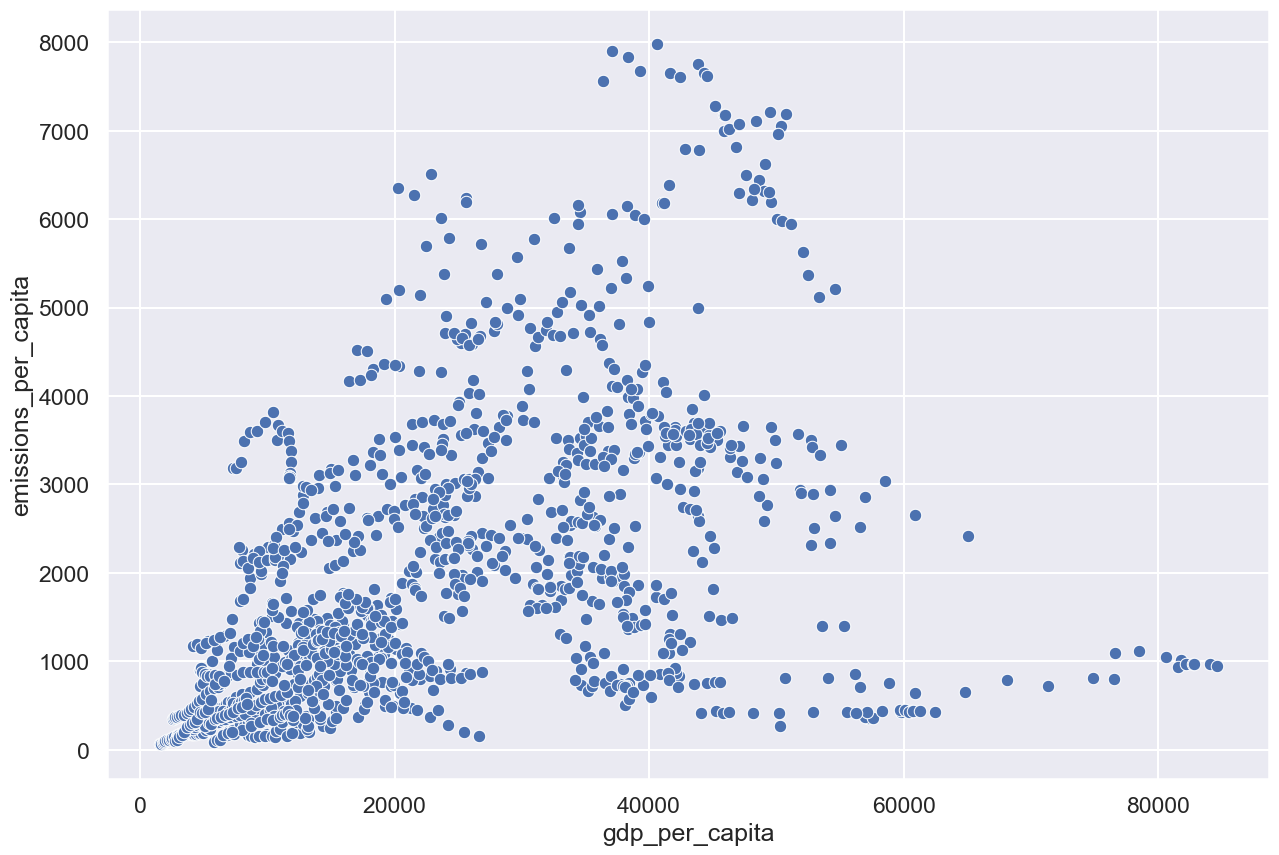

In [325]:
#plot gdp per capita against greenhouse emissions
plt.figure(figsize=(15,10))
sns.scatterplot(x='gdp_per_capita', y='emissions_per_capita', data=modeling_df_emissions)

In [326]:
columns_for_iqr = ['greenhouse_gas_emissions']

In [327]:
iqr_values = {}
for col in columns_for_iqr:
    q3, q1 = np.percentile(modeling_df_emissions[col].dropna(), [75, 25])
    iqr = q3 - q1
    iqr_values[col] = iqr

iqr_values


{'greenhouse_gas_emissions': 85.175}

In [328]:
#remove values outside the IQR for greenhouse gas emissions
iqr
modeling_df_emissions = modeling_df_emissions[modeling_df_emissions['greenhouse_gas_emissions'].between(q1 - 1.5*iqr, q3 + 1.5*iqr)]

In [329]:
modeling_df_emissions.loc[:,'emissions_per_capita'].describe()

count    1155.000000
mean     1863.031834
std      1561.377177
min        65.947674
25%       719.743844
50%      1327.204916
75%      2771.988677
max      7977.893166
Name: emissions_per_capita, dtype: float64

In [330]:
#complete linear regression analysis 
X = modeling_df_emissions.loc[:,'gdp_per_capita'].dropna()
y = modeling_df_emissions.loc[:,'emissions_per_capita'].dropna()

In [331]:
df['greenhouse_gas_emissions'].describe()

count    3108.000000
mean       58.710463
std       268.270099
min         0.010000
25%         0.530000
50%         4.420000
75%        23.685000
max      4085.990000
Name: greenhouse_gas_emissions, dtype: float64

In [332]:
X = sm.add_constant(X)
lin_reg = sm.OLS(y, X)
model = lin_reg.fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     emissions_per_capita   R-squared:                       0.157
Model:                              OLS   Adj. R-squared:                  0.157
Method:                   Least Squares   F-statistic:                     215.3
Date:                  Thu, 30 Nov 2023   Prob (F-statistic):           8.18e-45
Time:                          00:29:26   Log-Likelihood:                -10033.
No. Observations:                  1155   AIC:                         2.007e+04
Df Residuals:                      1153   BIC:                         2.008e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            918.814

In [361]:
keywords = ['energy_per_capita','cons_per_capita', 'gdp_per_capita']

per_capita_vals = [col for col in df.columns if any(word in col for word in keywords)]

In [362]:
to_remove =['fossil_energy_per_capita','energy_per_capita', 'low_carbon_energy_per_capita', 'other_renewables_energy_per_capita',
 'renewables_energy_per_capita']

per_capita_vals = [item for item in per_capita_vals if item not in to_remove]

In [364]:
per_capita_vals.append('emissions_per_capita')

In [365]:
per_capita_vals

['biofuel_cons_per_capita',
 'coal_cons_per_capita',
 'gas_energy_per_capita',
 'hydro_energy_per_capita',
 'nuclear_energy_per_capita',
 'oil_energy_per_capita',
 'solar_energy_per_capita',
 'wind_energy_per_capita',
 'gdp_per_capita',
 'emissions_per_capita']

In [337]:
df_per_capita = df.loc[:, :].dropna()
df_per_capita.loc[:, per_capita_vals]

,biofuel_cons_per_capita,coal_cons_per_capita,gas_energy_per_capita,hydro_energy_per_capita,nuclear_energy_per_capita,oil_energy_per_capita,solar_energy_per_capita,wind_energy_per_capita,gdp_per_capita,emissions_per_capita
262,208.889,352.081,10558.529,2072.072,408.038,8186.556,0.107,1.767,20133.806534,1135.577173
263,247.831,325.826,10884.775,1906.136,401.518,8593.353,0.534,24.174,19722.482850,1208.513542
264,280.795,352.440,10858.592,2107.085,382.964,9025.606,0.969,29.149,19989.142128,1200.803958
265,324.379,371.093,10777.813,2050.716,334.728,8871.545,1.009,39.190,19287.788022,1188.817577
266,349.792,365.585,10784.959,2013.172,420.508,8965.241,0.914,36.938,19600.381585,1245.576907
...,...,...,...,...,...,...,...,...,...,...
7336,1119.494,15560.023,22428.084,2151.492,6773.866,30100.135,245.780,1543.604,51182.996422,5943.814272
7337,1162.053,13336.334,22907.014,2044.595,6680.254,30469.750,327.083,1598.198,52070.775112,5632.181775
7338,1250.661,12104.576,22893.508,2157.956,6658.287,30443.965,453.415,1875.876,52451.166787,5364.594249
7339,1243.373,11681.913,22438.203,2395.115,6561.251,30497.400,629.895,2072.855,53355.826875,5121.239852


In [398]:
X = df_per_capita.loc[:, 'gdp_per_capita'].reset_index(drop=True)
y = df_per_capita.loc[:, per_capita_vals].reset_index(drop=True)

In [399]:
X = sm.add_constant(X)

In [400]:
models = {}

for column in y.columns:
    model = sm.OLS(y[column], X).fit()
    print(f'Results for {column}:')
    print(model.summary())
    print("\n\n")
    models[column] = model

Results for biofuel_cons_per_capita:
                               OLS Regression Results                              
Dep. Variable:     biofuel_cons_per_capita   R-squared:                       0.040
Model:                                 OLS   Adj. R-squared:                  0.035
Method:                      Least Squares   F-statistic:                     7.376
Date:                     Thu, 30 Nov 2023   Prob (F-statistic):            0.00726
Time:                             01:04:12   Log-Likelihood:                -1214.7
No. Observations:                      179   AIC:                             2433.
Df Residuals:                          177   BIC:                             2440.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [404]:
models

{'biofuel_cons_per_capita': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b68beb7e10>,
 'coal_cons_per_capita': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b68beed950>,
 'gas_energy_per_capita': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b6898adc90>,
 'hydro_energy_per_capita': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b68beb7650>,
 'nuclear_energy_per_capita': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b68bea4510>,
 'oil_energy_per_capita': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b68bea4310>,
 'solar_energy_per_capita': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b68bf07390>,
 'wind_energy_per_capita': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b68bf07690>,
 'gdp_per_capita': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b68bcffe50>,
 'emissions_per_capita': <statsmod

In [403]:
r_squared_vals = {}


for key in models:
    r_squared_vals[key] = models[key].rsquared


In [405]:
r_squared_vals

{'biofuel_cons_per_capita': 0.04000689005324698,
 'coal_cons_per_capita': 0.010707941536213239,
 'gas_energy_per_capita': 0.4701223077641842,
 'hydro_energy_per_capita': 0.19303553435409904,
 'nuclear_energy_per_capita': 0.22176664898238896,
 'oil_energy_per_capita': 0.6348386494533398,
 'solar_energy_per_capita': 0.08718293013059086,
 'wind_energy_per_capita': 0.20184369081985332,
 'gdp_per_capita': 1.0,
 'emissions_per_capita': 0.23843876638345896}

In [349]:
df_per_capita.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,gdp_per_capita,emissions_per_capita
965,Argentina,2011.0,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008,20133.806534,1135.577173
966,Argentina,2012.0,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107,19722.482850,1208.513542
967,Argentina,2013.0,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126,19989.142128,1200.803958
968,Argentina,2014.0,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171,19287.788022,1188.817577
1181,Argentina,2015.0,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160,19600.381585,1245.576907


<Axes: >

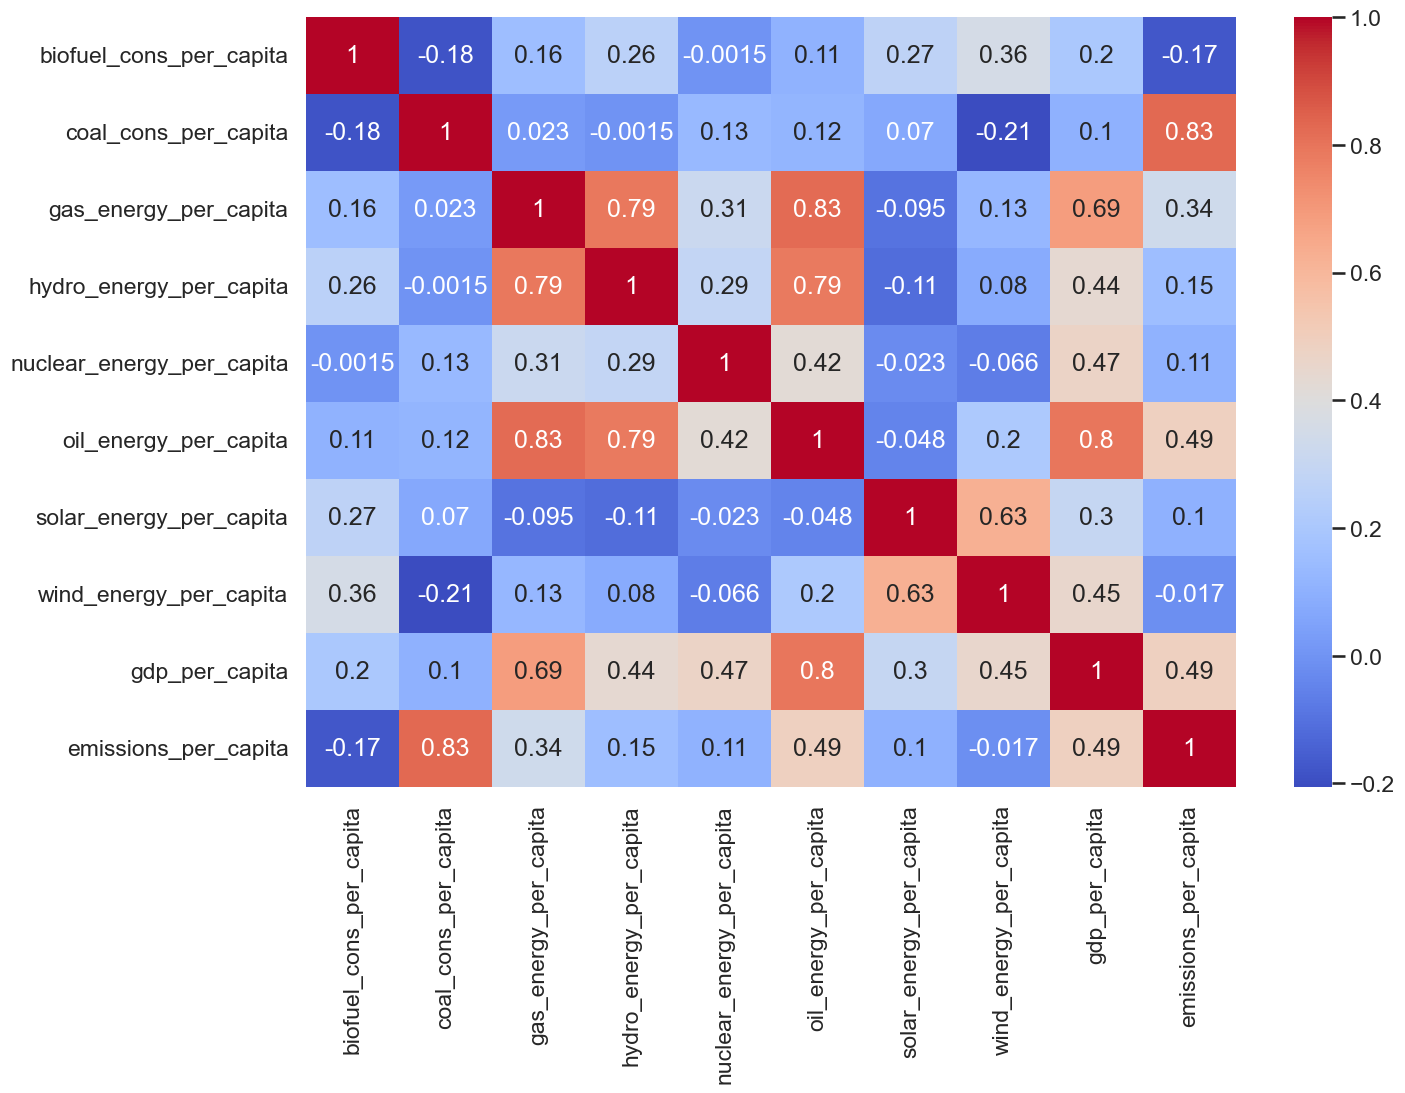

In [350]:
plt.figure(figsize=(15,10))
sns.heatmap(df_per_capita.loc[:, per_capita_vals].corr(), annot=True, cmap='coolwarm')

In [351]:
y = df_per_capita.loc[:, 'emissions_per_capita'].reset_index(drop=True)
X = df_per_capita.loc[:, ['coal_cons_per_capita']].reset_index(drop=True)

In [352]:
X = sm.add_constant(X)

In [353]:
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     emissions_per_capita   R-squared:                       0.686
Model:                              OLS   Adj. R-squared:                  0.685
Method:                   Least Squares   F-statistic:                     387.5
Date:                  Thu, 30 Nov 2023   Prob (F-statistic):           1.91e-46
Time:                          00:29:27   Log-Likelihood:                -1445.2
No. Observations:                   179   AIC:                             2894.
Df Residuals:                       177   BIC:                             2901.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

In [355]:
y = df_per_capita.loc[:, 'oil_energy_per_capita'].reset_index(drop=True)
X = df_per_capita.loc[:, ['gdp_per_capita']].reset_index(drop=True)

In [377]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     oil_energy_per_capita   R-squared:                       0.635
Model:                               OLS   Adj. R-squared:                  0.633
Method:                    Least Squares   F-statistic:                     307.7
Date:                   Thu, 30 Nov 2023   Prob (F-statistic):           1.43e-40
Time:                           00:46:55   Log-Likelihood:                -1807.0
No. Observations:                    179   AIC:                             3618.
Df Residuals:                        177   BIC:                             3624.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

In [378]:
y = df_per_capita.loc[:, 'oil_energy_per_capita'].reset_index(drop=True)
X = df_per_capita.loc[:, ['hydro_energy_per_capita']].reset_index(drop=True)

In [379]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     oil_energy_per_capita   R-squared:                       0.618
Model:                               OLS   Adj. R-squared:                  0.616
Method:                    Least Squares   F-statistic:                     286.3
Date:                   Thu, 30 Nov 2023   Prob (F-statistic):           7.91e-39
Time:                           00:47:49   Log-Likelihood:                -1811.0
No. Observations:                    179   AIC:                             3626.
Df Residuals:                        177   BIC:                             3632.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [381]:
import statsmodels.formula.api as smf

In [389]:
formula = 'oil_energy_per_capita ~ gdp_per_capita + hydro_energy_per_capita'
model = smf.glm(formula=formula, data=df_per_capita.loc[:, ['oil_energy_per_capita', 'gdp_per_capita', 'hydro_energy_per_capita']].dropna())

In [390]:
model = model.fit()
print_model = model.summary()
print(print_model)

                   Generalized Linear Model Regression Results                   
Dep. Variable:     oil_energy_per_capita   No. Observations:                  179
Model:                               GLM   Df Residuals:                      176
Model Family:                   Gaussian   Df Model:                            2
Link Function:                  Identity   Scale:                      1.2393e+07
Method:                             IRLS   Log-Likelihood:                -1714.3
Date:                   Thu, 30 Nov 2023   Deviance:                   2.1812e+09
Time:                           00:53:47   Pearson chi2:                 2.18e+09
No. Iterations:                        3   Pseudo R-squ. (CS):             0.9986
Covariance Type:               nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [415]:
df_per_capita['gdp_per_capita_centered'] = df_per_capita['gdp_per_capita'] - df_per_capita['gdp_per_capita'].mean()

In [418]:
df_per_capita.dropna(inplace=True)

In [424]:
formula = 'emissions_per_capita ~ gdp_per_capita_centered'
model = smf.glm(formula=formula, data=df_per_capita.loc[:, ['emissions_per_capita', 'gdp_per_capita_centered']].dropna())

In [425]:
model = model.fit()
print_model = model.summary()
print(print_model)

                  Generalized Linear Model Regression Results                   
Dep. Variable:     emissions_per_capita   No. Observations:                  164
Model:                              GLM   Df Residuals:                      162
Model Family:                  Gaussian   Df Model:                            1
Link Function:                 Identity   Scale:                      1.2534e+06
Method:                            IRLS   Log-Likelihood:                -1383.1
Date:                  Thu, 30 Nov 2023   Deviance:                   2.0304e+08
Time:                          01:25:00   Pearson chi2:                 2.03e+08
No. Iterations:                       3   Pseudo R-squ. (CS):             0.2208
Covariance Type:              nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc